In [2]:
from murenn import DTCWT, IDTCWT
import torch
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
N = 2**7
J = 5

x = torch.zeros(1, 1, N)
x[0, 0, N//2] = 1

fwd = DTCWT(J = J, normalize=True, alternate_gh=False)
inv = IDTCWT(J = J, normalize=True, alternate_gh=False)

lp, bps = fwd(x)

In [4]:
def vis_filt(dtcwt, idtcwt):
    N = 2**10
    x = torch.zeros(1, 1, N)
    x[0, 0, N//2] = 1
    lp, bps = dtcwt(x)
    J = len(bps)

    yr, yi = [], []
    for j in range(J):
        y_phi = lp * 0
        y_psis_r = [torch.real(bps[k] * (j==k)) * (1 + 0j) for k in range(J)]
        y_psis_i = [torch.imag(bps[k].flip() * (j==k)) * (0 + 1j) for k in range(J)]
        yr.append(idtcwt(y_phi, y_psis_r).squeeze())
        yi.append(idtcwt(y_phi, y_psis_i).squeeze())


    fig, axes = plt.subplots(J, 1, figsize=(5, 10), sharex=True)
    for j, ax in enumerate(axes):
        ax.plot(yr[j].numpy(), label=f'real', color='tab:blue')
        ax.plot(yi[j].numpy(), label=f'imag', color='tab:green')
        ax.plot(torch.abs(torch.complex(yi[j], yr[j])).numpy(),
            label=f'abs', color='tab:red', linestyle='--')
        ax.grid(linestyle='--', alpha=0.5)
        ax.legend(loc='upper right')
        ax.set_title(f'J = {j+1}')
    plt.xticks(range(0, 1+N, N//16))
    plt.xlim(N//4, 3*N//4)
    plt.xlabel('Time')

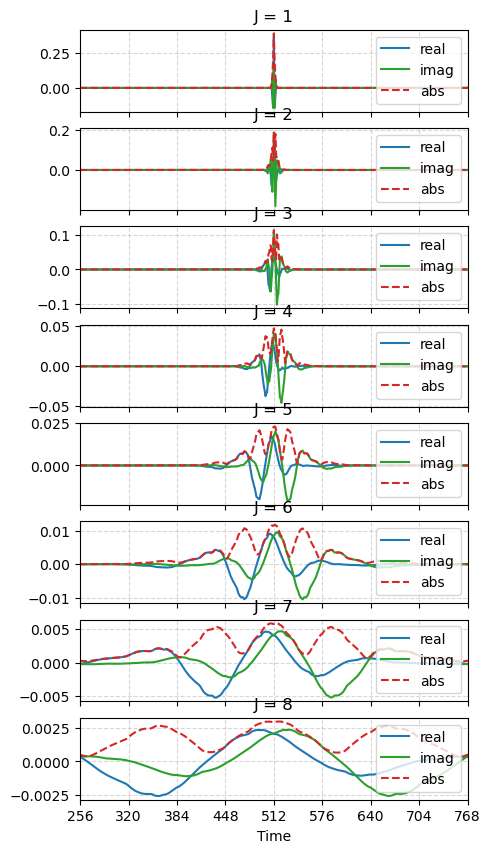

In [5]:
kwargs1 = {"alternate_gh": False, "normalize": False}
dtcwt1, idtcwt1 = DTCWT(**kwargs1), IDTCWT(**kwargs1)
vis_filt(dtcwt1, idtcwt1)

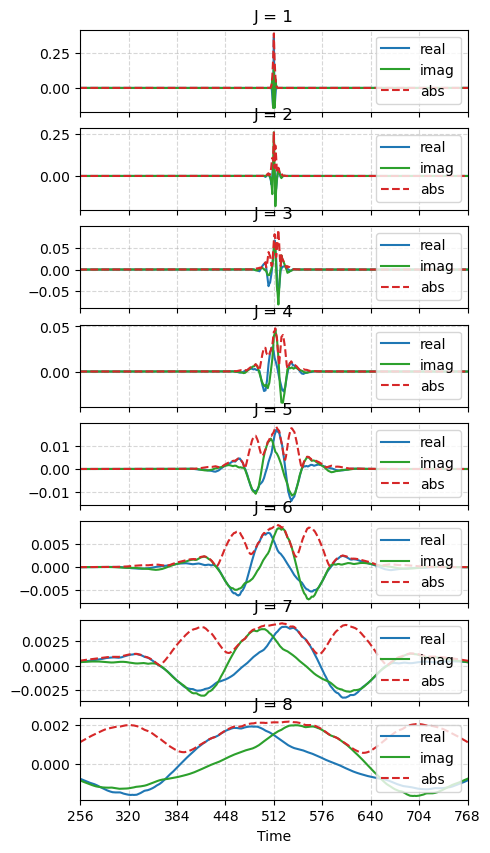

In [6]:
kwargs2 = {"alternate_gh": True}
dtcwt2, idtcwt2 = DTCWT(**kwargs2), IDTCWT(**kwargs2)
vis_filt(dtcwt2, idtcwt2)